**Exploratory Data Analysis:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('dataset.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [6]:
df.info(verbose=None);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


There are some data missing in the 'bmi', 'smoking status' features

In [13]:
## how many missing data
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [15]:
## since we have a lot of data points one simple way to deal with null values is to drop them

df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29072 non-null  int64  
 1   gender             29072 non-null  object 
 2   age                29072 non-null  float64
 3   hypertension       29072 non-null  int64  
 4   heart_disease      29072 non-null  int64  
 5   ever_married       29072 non-null  object 
 6   work_type          29072 non-null  object 
 7   Residence_type     29072 non-null  object 
 8   avg_glucose_level  29072 non-null  float64
 9   bmi                29072 non-null  float64
 10  smoking_status     29072 non-null  object 
 11  stroke             29072 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.9+ MB


(29072, 12)

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [32]:
## stroke in male vs female prevailance
print('Stroke occurence in Male:')
print(round(sum((df['gender']=='Male') & (df['stroke']==1))/sum(df['gender']=='Male'),5))

print('Stroke occurence in Female:')
print(round(sum((df['gender']=='Female') & (df['stroke']==1))/sum(df['gender']=='Female'),5))

Stroke occurence in Male:
0.02096
Stroke occurence in Female:
0.01753


In [37]:
## Stroke prevailance in urban and rural people
print('Stroke occurence in Urban Residence type:')
print(round(sum((df['Residence_type']=='Urban') & (df['stroke']==1))/sum(df['Residence_type']=='Urban'),4))

print('Stroke occurence in Rural Residence type:')
print(round(sum((df['Residence_type']=='Rural') & (df['stroke']==1))/sum(df['Residence_type']=='Rural'),4))

Stroke occurence in Urban Residence type:
0.0191
Stroke occurence in Rural Residence type:
0.0186


In [43]:
## Stroke previlance in married people:
print('Stroke previlance in married people:')
print(round(sum((df['ever_married']=='Yes') & (df['stroke']==1))/sum(df['ever_married']=='Yes'),5))

print('Stroke previlance in unmarried people:')
print(round(sum((df['ever_married']=='No') & (df['stroke']==1))/sum(df['ever_married']=='No'),5))

Stroke previlance in married people:
0.02264
Stroke previlance in unmarried people:
0.00772


 **Classification Models**

Text(0, 0.5, 'Glucose Level')

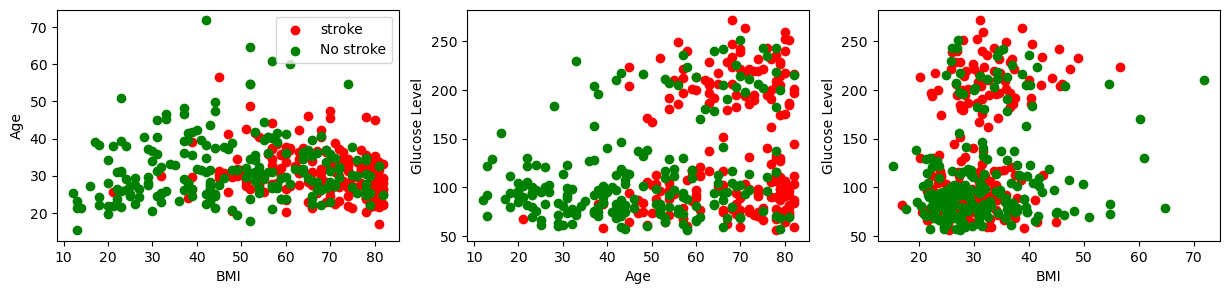

In [74]:
## Classification Nearest Neighbour model
## let's Use the following three float type features: 'Age','avg_glucose_level','bmi'

## let's try to plot the data for a visualization
fig,axes=plt.subplots(1,3,figsize=(15,3))
axes[0].scatter(df.loc[df['stroke']==1,'age'][0:200],df.loc[df['stroke']==1,'bmi'][0:200],c='red',label='stroke')
axes[0].scatter(df.loc[df['stroke']==0,'age'][0:200],df.loc[df['stroke']==0,'bmi'][0:200],c='green',label='No stroke')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Age')
axes[0].legend()
axes[1].scatter(df.loc[df['stroke']==1,'age'][0:200],df.loc[df['stroke']==1,'avg_glucose_level'][0:200],c='red',label='stroke')
axes[1].scatter(df.loc[df['stroke']==0,'age'][0:200],df.loc[df['stroke']==0,'avg_glucose_level'][0:200],c='green',label='No stroke')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Glucose Level')
axes[2].scatter(df.loc[df['stroke']==1,'bmi'][0:200],df.loc[df['stroke']==1,'avg_glucose_level'][0:200],c='red',label='stroke')
axes[2].scatter(df.loc[df['stroke']==0,'bmi'][0:200],df.loc[df['stroke']==0,'avg_glucose_level'][0:200],c='green',label='No stroke')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Glucose Level')

From above figures it is indicative that Age is a more reliable feature than BMI and Glucose level

In [96]:
###### K Nearest Neighbor Model   ########
from sklearn.model_selection import train_test_split
## lets split data into training and test data set
x_train,x_test,y_train,y_test=train_test_split(df[['age','bmi','avg_glucose_level']],df['stroke'],random_state=0)


In [97]:
x_train.shape

(21804, 3)

In [98]:
x_test.shape

(7268, 3)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
## lets choose 4 neighbors
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))

Training set accuracy:0.982
Test set accuracy:0.979


In [105]:
sum(df['stroke']==1) # Number of stroke 1 in data set

548

In [107]:
## This type high accuracy is not correct. As we see very small amount data in the dataset belong to class=1 .
# This might be leading to high accuracy Since there are mostly class=0 data in dataset, the model is getting biased to 
## predict class as 0 which accidentally gives correct result due to dataset distribution

In [108]:
## We can choose a set of data from this data set where class 0 and class 1 is well mixed

In [115]:
frames=[ 
    df.loc[df['stroke']==1,['age','bmi','avg_glucose_level','stroke']],
    df.loc[df['stroke']==0,['age','bmi','avg_glucose_level','stroke']][0:700]
    ]
df_mix=pd.concat(frames)

In [116]:
df_mix

,age,bmi,avg_glucose_level,stroke
63,67.0,36.6,228.69,1
141,80.0,32.5,105.92,1
257,49.0,34.4,171.23,1
264,79.0,24.0,174.12,1
288,81.0,29.0,186.21,1
...,...,...,...,...
1032,48.0,26.5,63.33,0
1033,38.0,43.7,69.34,0
1035,63.0,46.2,66.13,0
1036,37.0,49.5,67.53,0


In [117]:
x_train,x_test,y_train,y_test=train_test_split(df_mix[['age','bmi','avg_glucose_level']],df_mix['stroke'],shuffle=True)


In [120]:
y_train

105      0
4195     1
7985     1
632      0
22549    1
        ..
646      0
35597    1
672      0
474      0
24093    1
Name: stroke, Length: 936, dtype: int64

In [121]:
## Now the classes are well mixed

In [123]:
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))

Training set accuracy:0.798
Test set accuracy:0.696


In [124]:
## This training and test accuracy seems much more realistic to the plots as we had seen. The two classes are not very clearly 
## separated so we odn't expect the KNN method to work well

In [125]:
# with 6 neighbors
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train,y_train)
print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))

Training set accuracy:0.795
Test set accuracy:0.715


In [126]:
# with 8 neighbors
clf=KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train,y_train)
print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))

Training set accuracy:0.790
Test set accuracy:0.731


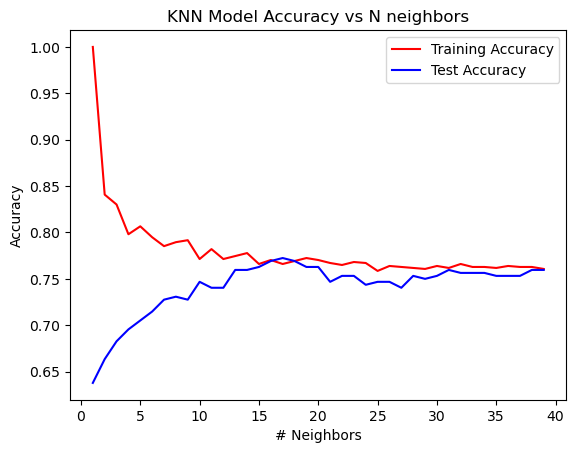

In [137]:
train_acc=[]
test_acc=[]
neighbor=[]
for n in range(1,40):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train)
    neighbor.append(n)
    train_acc.append(clf.score(x_train,y_train))
    test_acc.append(clf.score(x_test,y_test))
plt.plot(neighbor,train_acc,label='Training Accuracy',c='red')
plt.plot(neighbor,test_acc,label='Test Accuracy',c='blue')
plt.ylabel('Accuracy')
plt.xlabel('# Neighbors')
plt.title('KNN Model Accuracy vs N neighbors')
plt.legend();


In [138]:
### Linear Model: Logistic Regression #############


In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# clf=LogisticRegression.fit(x_train,y_train)

x = df_mix[['age','bmi','avg_glucose_level']].values 
y = df_mix['stroke'].values
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size=0.25, random_state=0)
## Transform dataset
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test) 
  
print (x_train[0:10, :])

[[ 0.31770584 -0.82440177  1.03463083]
 [ 0.         -0.1434052  -0.74930974]
 [ 1.21787237  1.00577653 -0.82520658]
 [-0.90016654  0.62271595  0.03556573]
 [ 0.74131362  1.20440053  2.65911507]
 [-0.63541167  0.90646453 -0.87811543]
 [ 0.15885292 -1.15071263 -0.56978453]
 [-0.10590195 -0.56902806 -0.14560148]
 [ 1.21787237  0.65109081  1.81877653]
 [ 1.1649214  -0.29946691 -0.9483565 ]]


In [149]:
clf = LogisticRegression(random_state = 0).fit(x_train, y_train) 

print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))


Training set accuracy:0.747
Test set accuracy:0.769


In [146]:
## Parameter C in Logistic resgression Regularization C low value-->Lot of regularization/ more generalization 
## C-->high value--->More complex model 

In [150]:
clf = LogisticRegression(C=10).fit(x_train, y_train) 

print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))


Training set accuracy:0.747
Test set accuracy:0.769


In [151]:
clf = LogisticRegression(C=100).fit(x_train, y_train)

print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))


Training set accuracy:0.747
Test set accuracy:0.769


In [152]:
###        Linear Support Vector Machine Model  #########

In [166]:
from sklearn.svm import LinearSVC
x_train,x_test,y_train,y_test=train_test_split(df_mix[['age','bmi','avg_glucose_level']],df_mix['stroke'],shuffle=True)

clf = LinearSVC(dual='auto').fit(x_train, y_train) 

print('Training set accuracy:{:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy:{:.3f}'.format(clf.score(x_test,y_test)))


Training set accuracy:0.756
Test set accuracy:0.744


In [168]:
###    Decision Tree Model  ##########################

In [205]:
## Let's Use More features in this model 

In [172]:
frames=[ 
    df.loc[df['stroke']==1,:],
    df.loc[df['stroke']==0,:][0:700]
    ]
df_mix_t=pd.concat(frames)

In [179]:
df_mix_t.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
288,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [193]:
x_train,x_test,y_train,y_test=train_test_split(
    df_mix_t[['age','hypertension','heart_disease',
            'bmi','avg_glucose_level']],
    df_mix_t['stroke'],shuffle=True)


In [194]:
y_train

510      0
35082    1
11884    1
394      0
18533    1
        ..
29285    1
217      0
12133    1
12876    1
238      0
Name: stroke, Length: 936, dtype: int64

In [195]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

print('Training score:{:.3f}'.format(tree.score(x_train, y_train)))
print('Test score:{:.3f}'.format(tree.score(x_test,y_test)))


Training score:1.000
Test score:0.676


In [196]:
## As expected the training score is 1. The tree fits exactly to all available data points in training set
## To avoid the overfitting We can control the depth of the tree model

In [197]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print('Training score:{:.3f}'.format(tree.score(x_train, y_train)))
print('Test score:{:.3f}'.format(tree.score(x_test,y_test)))


Training score:0.794
Test score:0.740


In [198]:
## Even though the training score is not perfect the test score has improved

In [203]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(x_train,y_train)

print('Training score:{:.3f}'.format(tree.score(x_train, y_train)))
print('Test score:{:.3f}'.format(tree.score(x_test,y_test)))


Training score:0.831
Test score:0.744


In [204]:
print('Feature importance :\n{}'.format(tree.feature_importances_))

Feature importance :
[0.6863092  0.00298521 0.01409769 0.09001451 0.20659338]


Text(0, 0.5, 'feature')

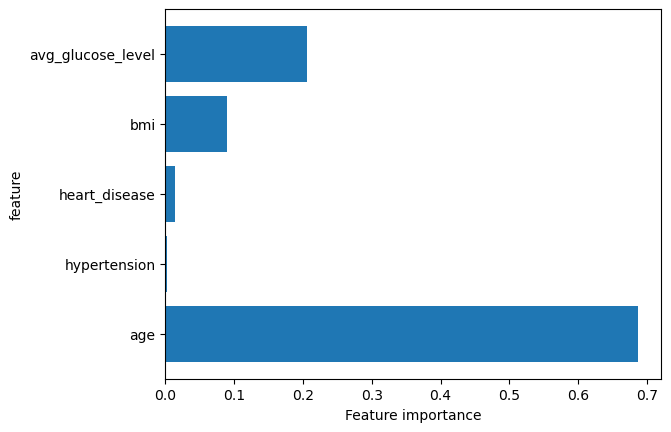

In [209]:
features=['age','hypertension','heart_disease','bmi','avg_glucose_level']
n_features=len(features)
plt.barh(range(n_features), tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),features)
plt.xlabel('Feature importance')
plt.ylabel('feature')